## Covid-19 Cases

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)

%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

In [3]:
data_path = "../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
pd_raw = pd.read_csv(data_path)
    
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base = pd_data_base.drop(['Lat', 'Long'],axis=1)

In [4]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180122,180174,180259,180347,180419,180520,180584,180615,180615,180688
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276081,276101,276101,276101,276221,276221,276310,276342,276401,276415
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265873,265873,265877,265884,265887,265889,265889,265889,265897,265900
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,43067,43067,43067,43067
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99527,99527,99761,99761,99761,99761,99761,99761,99761,99761


In [5]:
countries = pd_data_base['country']

In [6]:
df_cases_countries = pd.DataFrame({'date':pd_raw.columns[4:]})
df_cases_countries

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
862,6/2/22
863,6/3/22
864,6/4/22
865,6/5/22


In [7]:
for country in countries:
    # add for each country a new column in df_cases_countries by summing up values of each Province/State with corresponding country
    df_cases_countries[country] = np.array(pd_raw[pd_raw['Country/Region']==country].iloc[:,4::].sum(axis=0))

In [8]:
df_cases_countries.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


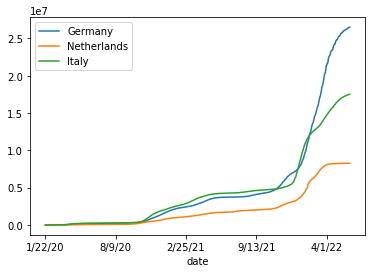

In [9]:
countries_plot = ["Germany", "Netherlands", "Italy"]

%matplotlib inline
df_cases_countries.set_index('date')[countries_plot].plot()

In [10]:
df_cases_countries.to_csv("../data/processed/COVID_cases_countries.csv", sep=";", index=False)

## Vaccinations "Our World in Data"

In [11]:
data_path = "../data/raw/vaccinations/covid-19-data/public/data/vaccinations/vaccinations.csv"
pd_raw = pd.read_csv(data_path)
# pd_raw = pd_raw.iloc[:50,:]
pd_raw.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


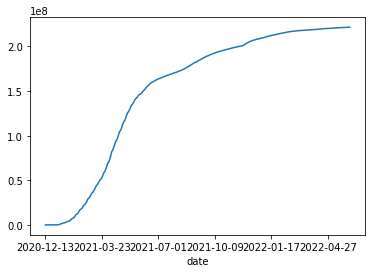

In [12]:
plt.figure()
ax = pd_raw[(pd_raw['location']=='United States')].set_index('date')['people_fully_vaccinated'].plot()

In [13]:
countries = pd_raw['location'].drop_duplicates()
df_vacc_countries = pd.DataFrame({'date':pd_raw['date'].drop_duplicates()})
# pd_raw.set_index('date', inplace=True)
df_vacc_countries.set_index('date', inplace=True)
# df_vacc_countries[country] = np.array(pd_raw.loc[(pd_raw['location']=='Afghanistan') & (pd_raw['date']=='2021-02-25')])
for country in countries:
    df_country = pd.DataFrame({'date': pd_raw.loc[pd_raw['location']==country]['date'], country: pd_raw.loc[pd_raw['location']==country]['people_fully_vaccinated']})
    df_country.set_index('date', inplace=True)
    df_vacc_countries = df_vacc_countries.join(df_country, how='outer')
df_vacc_countries

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,NaN,238535512.0,NaN,NaN,NaN,NaN,NaN,NaN,22956316.0,NaN,...,NaN,NaN,NaN,79331294.0,NaN,NaN,4.722367e+09,NaN,3534173.0,4525568.0
2022-06-03,NaN,238705604.0,NaN,NaN,NaN,NaN,NaN,NaN,22958946.0,NaN,...,NaN,NaN,NaN,79373469.0,NaN,NaN,4.723909e+09,NaN,3674839.0,4538872.0
2022-06-04,NaN,238721151.0,NaN,NaN,NaN,NaN,NaN,NaN,22959472.0,NaN,...,NaN,NaN,NaN,79407336.0,NaN,NaN,4.725582e+09,NaN,NaN,4539718.0


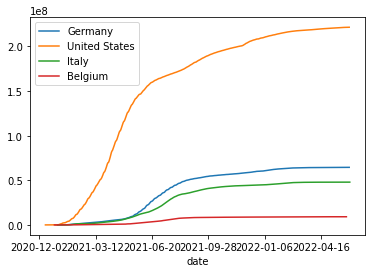

In [21]:
countries_plot = ["Germany", "United States", "Italy", "Belgium"]

%matplotlib inline
df_vacc_countries[countries_plot].plot()

In [20]:
df_vacc_countries.to_csv("../data/processed/COVID_vaccinations_countries.csv", sep=";", index=True)